Модульная домашняя работа №1
=======

Вариант 8

In [2]:
import numpy as np
import pandas as pd
import math
import random
import statistics
import scipy.stats

In [3]:
#  Задаем рабочую папку
import os
os.chdir("/Users/adminadministrator/Documents/Институт биоинформатики/статистика/часть 2")


In [4]:
import matplotlib
import matplotlib.pyplot as plt

# выбор темы картинок на мой вкус. Необязательная строчка.
matplotlib.style.use('ggplot')
# Эта строчка нужна для того, чтобы картинки отображались в ячейках
%matplotlib inline

### Задание 1

Очевидно, что $\hat{\theta}_n = e^{\overline{x}}$ является оценкой для $e^{mp}$. Покажем, что $\frac{\hat{\theta}_n - E\hat{\theta}_n}{\sqrt{D\hat{\theta}_n}} = \frac{e^{\overline{x}} - e^{mp}}{\sqrt{D\hat{\theta}_n}} $ сходится к нормальному распределению при увеличиненнии выборки. Буду это показывать на примере коэффициент эксцесса. 

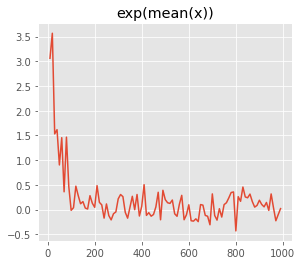

In [52]:
p = 0.1
m = 20
theta_array = []
max_sample = 1000
step = 10
repeat = 1000
for n in  range(step, max_sample, step):
    # theta_array.append((np.exp(np.mean(np.random.binomial(m, p, n))) - np.exp(p*n))*math.sqrt(n))
    temp = []
    sup_temp = -float('Inf')
    for _ in range(repeat):
        sample = np.random.binomial(m, p, n)
        temp.append((np.exp(np.mean(sample)) - np.exp(p*m)))
    theta_array.append(scipy.stats.kurtosis(temp))
        
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title("exp(mean(x))")
# plt.xlabel("xlabel")
# plt.ylabel("ylabel")
# plt.hist(x = theta_array, bins=40,  density = True)
plt.plot(list(range(step,max_sample,step)),theta_array)

Мы видим, что коэффициент эксцесса сходится к 0 с увеличением объема выборки. Можно предположить, что распределние также сходится к нормальному

Асимптотическая несмещенность:

In [58]:
array = []
for n in range(5, 1000, 1):
    s = []
    for _ in range(10):
        s.append(np.exp(np.mean(np.random.binomial(m, p, n))) - np.exp(p*m))
    array.append(np.mean(s))

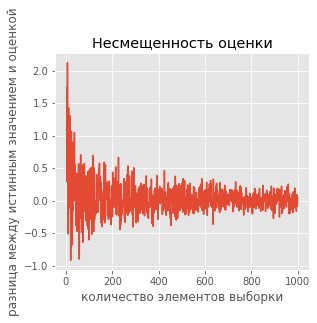

In [60]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title("Несмещенность оценки")
plt.xlabel("количество элементов выборки")
plt.ylabel("разница между истинным значением и оценкой")
plt.plot(list(range(5,1000,1)),array)

В результате приведенного выше наблюдения моно сделать вывод о том, что это является асимптотически несмещенной оценкой. 

### Задание 2

аналогично дз 3


$\hat{med(X)} - z_{1-\varepsilon/2} 2 p(x_{1/2}) \frac{1}{\sqrt{n}} <med(X) < \hat{med(X)} + z_{1-\varepsilon/2} 2 p(x_{1/2}) \frac{1}{\sqrt{n}} $

рассмотрим нормальное распредление с известным стандартным отклонением $\sigma$, тогда, согласно дз 3 получаем (медиана совпадает со средним обазначеным здесь a):
$\hat{med(X)} - z_{1-\varepsilon/2}\sigma \sqrt{\frac{\pi}{2n}} < a < \hat{med(X)} + z_{1-\varepsilon/2}\sigma \sqrt{\frac{\pi}{2n}}$

Зависимость от объема выборки ширины доверительного интервала

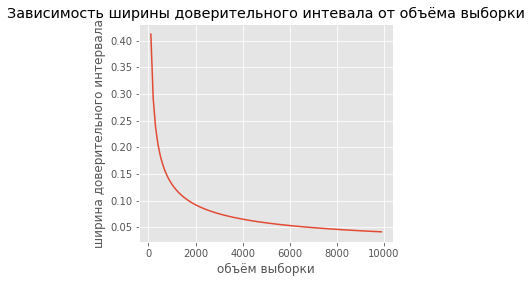

In [20]:
eps = 0.1
z = scipy.stats.norm.ppf(1-eps/2)
a, sigma = 10, 1
n = 1000
zz = z * sigma * math.sqrt(math.pi/(2*n))
summ = 0

max_sample = 10000
step = 100

answer = []
for n in range(step, max_sample, step):
    answer.append(z*sigma*math.sqrt(2*math.pi/n))
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title("Зависимость ширины доверительного интевала от объёма выборки")
plt.xlabel("объём выборки")
plt.ylabel("ширина доверительного интервала")
plt.plot(list(range(step,max_sample,step)),answer)

Демонстрация того, что доверительный интервал - доверительный

In [92]:
eps = 0.1
z = scipy.stats.norm.ppf(1-eps/2)
a, sigma = 10, 1
n = 1000
zz = z * sigma * math.sqrt(math.pi/(2*n))
summ = 0
nn = 1000
for i in range(nn):
    s = np.random.normal(a, sigma, n)
    theta = statistics.median(s)
    if theta - zz < a and theta + zz > a:
        summ += 1
print ('eps = ', eps, '  сколько значений не попало =', 1 - summ/nn)

eps =  0.1   сколько значений не попало = 0.10699999999999998


In [93]:
eps = 0.05
z = scipy.stats.norm.ppf(1-eps/2)
a, sigma = 10, 1
n = 1000
zz = z * sigma * math.sqrt(math.pi/(2*n))
summ = 0
nn = 1000
for i in range(nn):
    s = np.random.normal(a, sigma, n)
    theta = statistics.median(s)
    if theta - zz < a and theta + zz > a:
        summ += 1
print ('eps = ', eps, '  сколько значений не попало =', 1 - summ/nn)

eps =  0.05   сколько значений не попало = 0.04400000000000004


In [97]:
eps = 0.01
z = scipy.stats.norm.ppf(1-eps/2)
a, sigma = 10, 1
n = 10000
zz = z * sigma * math.sqrt(math.pi/(2*n))
summ = 0
nn = 10000
for i in range(nn):
    s = np.random.normal(a, sigma, n)
    theta = statistics.median(s)
    if theta - zz < a and theta + zz > a:
        summ += 1
print ('eps = ', eps, '  сколько значений не попало =', 1 - summ/nn)

eps =  0.01   сколько значений не попало = 0.00880000000000003


Как видно из приведенных выше вычисленний доверительные интервалы - действительно доверительные

### Задание 3

для выполнения данного задания рассмотрим нормальное распредление. С средним 10 и стандартным отклонением 1

In [15]:
a, sigma = 10, 1

suprem = []

step = 100
max_sample = 5000

for n in range(step, max_sample, step):
    s = np.sort(np.random.normal(a, sigma, n))
    sup_temp = 0
    for i in range(n):
        sup_temp = max(sup_temp, abs(scipy.stats.norm.cdf(s[i], loc = a, scale = sigma) - i/n), abs(scipy.stats.norm.cdf(s[i], loc = a, scale = sigma) - (i+1)/n))
    suprem.append(sup_temp)


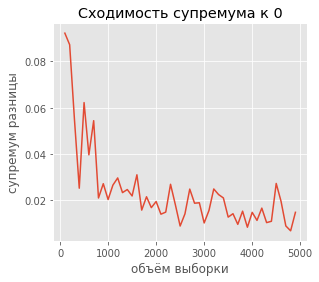

In [16]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title("Сходимость супремума к 0")
plt.xlabel("объём выборки")
plt.ylabel("супремум разницы")
plt.plot(list(range(step,max_sample,step)),suprem)

Таким образом продемонстрировано выполнение теоремы Гливенко-Кантелли